# Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Advertising.csv')
df.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
176,177,248.4,30.2,20.3,20.2
95,96,163.3,31.6,52.9,16.9
172,173,19.6,20.1,17.0,7.6
40,41,202.5,22.3,31.6,16.6
0,1,230.1,37.8,69.2,22.1


In [2]:
# Let's Check how big data is our dataset.
print('The Shape of the our dataset is : ', df.shape)
df.columns.tolist()


The Shape of the our dataset is :  (200, 5)


['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

## About The Columns:
`Unnamed:0` :- It would be a kind of serial numbers only.

`Tv` :- Advertising dollers spent on TV for a single product in a given market.

`Radio` :- Advertising dollers spent on Radio.

`Newspaper` :- Advertising doller spent on Radio.

### Target:-
`Sales`:- Sales of a single product in a given market.

### Checking the type of our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Observation:-
- column Unnamed:0 is an nomial data, somewhere we will drop it because it is not relate to our target variable.
- Otherwise all columns are float datatype i.e. continuos data.
- Seems there is no null values present in our dataset.

 

# Statistical Analysis


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Observation :-
###### `TV`
- Mean:- 147.042
- Std:- 85.854
- Min:- 0.7
- Max:- 296.4
After observing the statistics of this features, seems the data quite well distributed.

###### ` Radio`
- Mean:- 23.26
- Std:- 14.846
- Min:- 0
- Max:- 49.60
The min spending of radio advertisment is zero, which could be possible. And seems the data is  quite well distributed.

###### ` Newspaper`
- Mean:- 30.55
- Std:- 21.77
- Min:- 0.30
- Max:- 114
The distribution of the data from minimum to maximum is not satisfying. Seems there is some outlier present in this particular column.

# EDA:

### Data Cleaning

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
# Dropping the unwanted columns:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [7]:
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


## Checking & Dropping Duplicates

In [8]:
df.drop_duplicates()
df.shape

(200, 4)

There was no duplicates present in my dataset. 


## Distribution of data:

In [9]:
## importing necessary librabries for visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

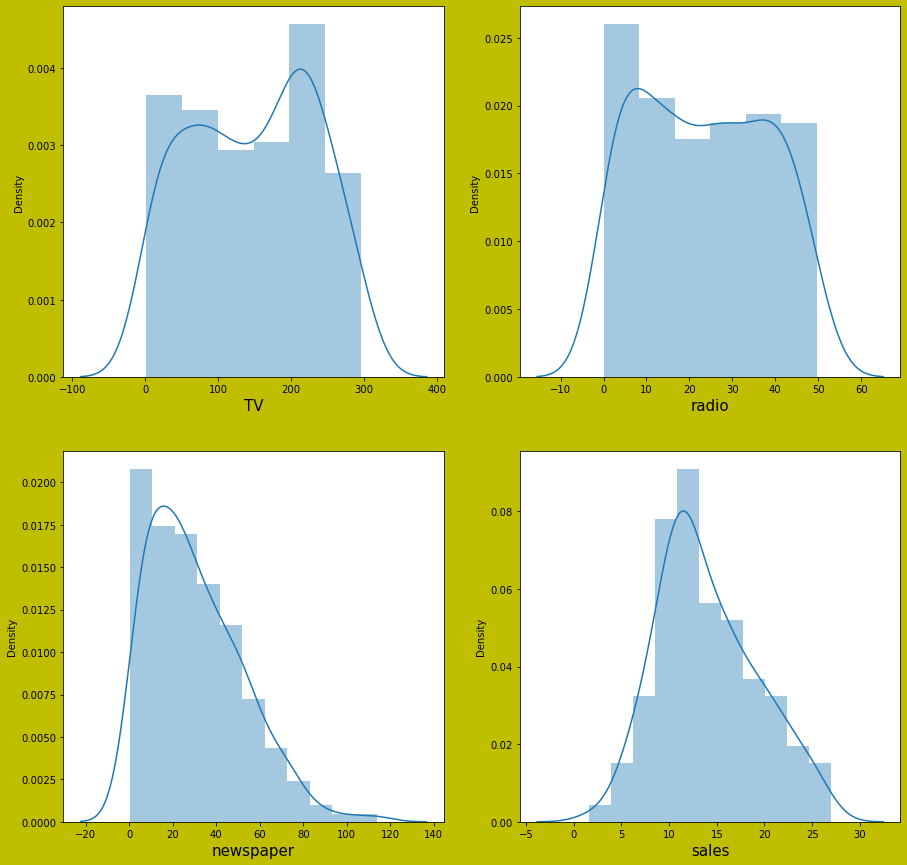

In [10]:
plt.figure(figsize=(15,15),facecolor='y')
plot=1
for column in df:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plot+=1
plt.show()

## Observation:-
- The distribution of 'TV' and 'Radio' is perfectly fine.
- Our Assumption seems true that newspaper is right skewed.

 We will check if there any outliers presents, or not. Let's check first check skewness of our dataset.

## Checking skewness:


In [11]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

We can clerly see that the skewness of newspaper is 0.89 which is greater than 0.5

## Checking Outliers:

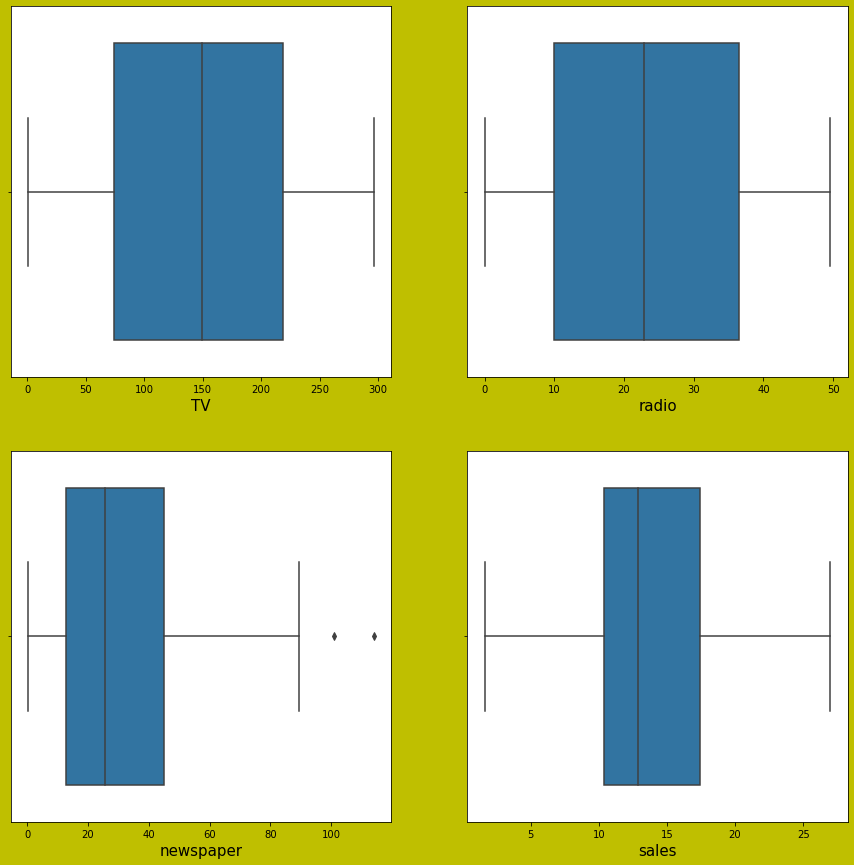

In [12]:
plt.figure(figsize=(15,15),facecolor='y')
plot=1
for column in df:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    plot+=1
plt.show()

There are some outliers present in newspaper column.
let's handle with outliers.

In [13]:
### Treating outlier using zscore
from scipy.stats import zscore
score=zscore(df)
thersold=3
df_new=df.loc[(abs(score)<3).all(axis=1)]
print('The shape of our dataset before : ', df.shape)
'\n'
print('*'*50)
print('\n')
print('The new shape of our dataset : ', df_new.shape)

The shape of our dataset before :  (200, 4)
**************************************************


The new shape of our dataset :  (198, 4)


In [14]:
## Checking Dataloss
data_loss=((200-198)/200)*100
print('dataloss is : ', data_loss,'%')

dataloss is :  1.0 %


Since we remove the outliers let's check the distribution of our dataset.

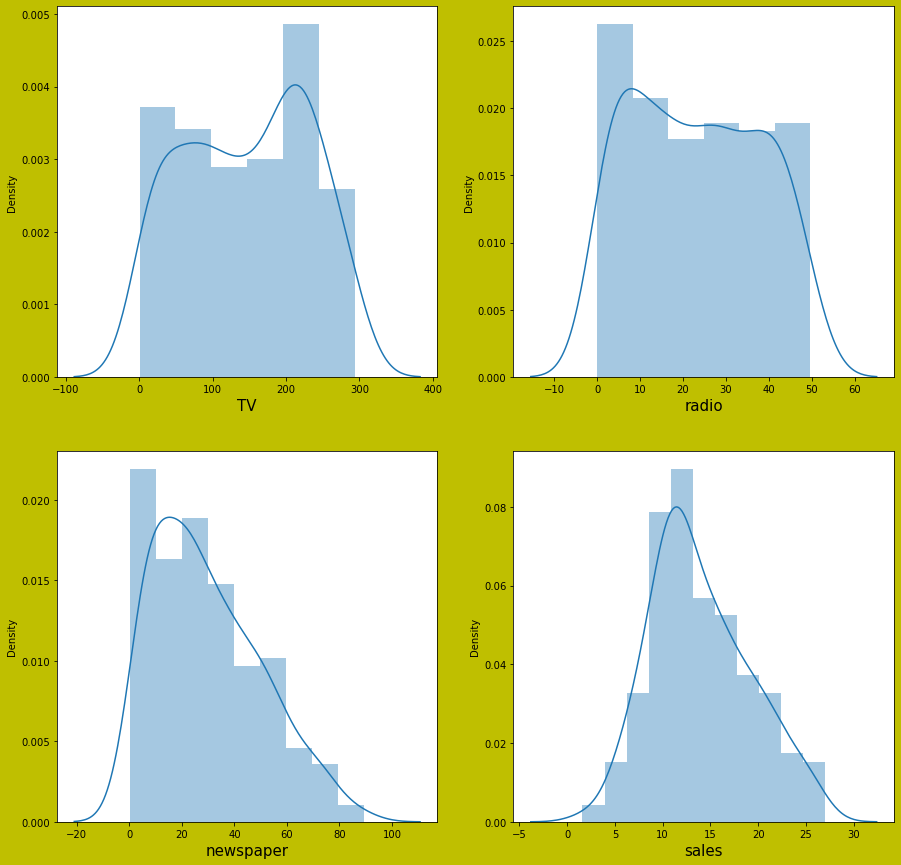

In [15]:
plt.figure(figsize=(15,15),facecolor='y')
plot=1
for column in df_new:
    if plot<=5:
        ax=plt.subplot(2,2,plot)
        sns.distplot(df_new[column],kde=True)
        plt.xlabel(column, fontsize=15)
    plot+=1
plt.show()

Now the distribution looks quite fine.

Let's Treat skewness as well.

## Treating Skewness Using SquareRoot transformation:

In [16]:
df_new['newspaper']=np.sqrt(df_new['newspaper'])

In [17]:
## Checking skewness now:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

The skewness has been gone.

Let's visualize the newspaper.

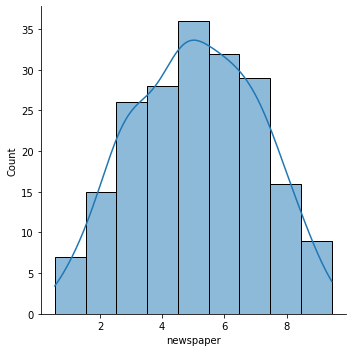

In [18]:
sns.displot(df_new['newspaper'],kde=True)

## The distribution is perfectly find.

## Checking Correlation with target variable:

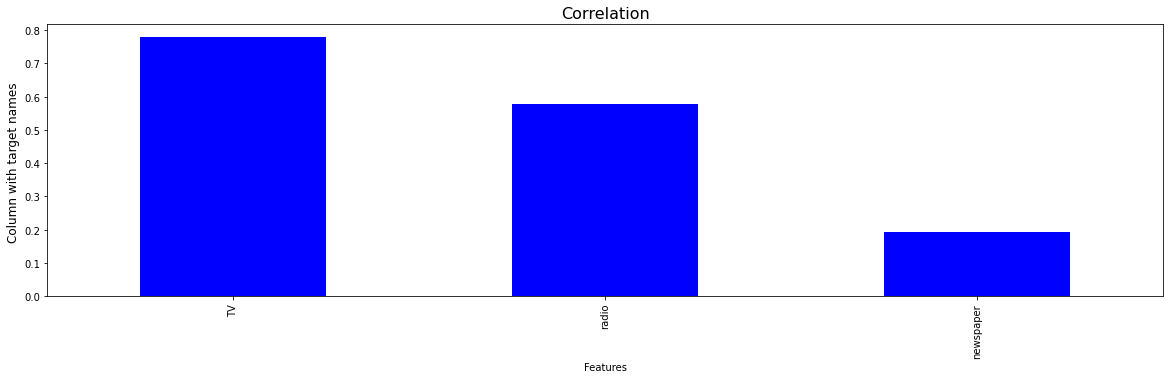

In [19]:
plt.figure(figsize=(20,5))
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Column with target names ',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

## Checking relationship 

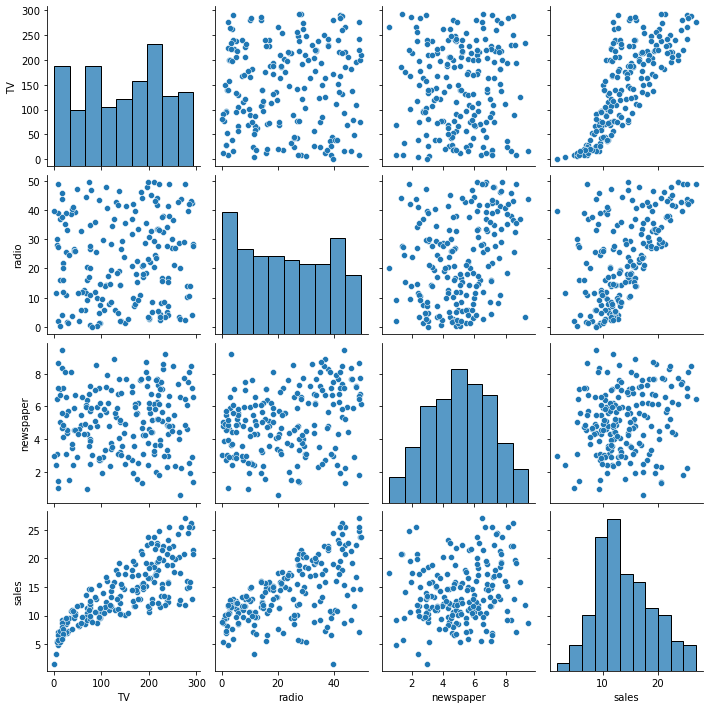

In [20]:
sns.pairplot(df_new)
plt.show()

Seems TV is strongly related with our target  variable.

let's plot heatmap for better satisfaction.

# Checking Correlation: 'Heatmap'

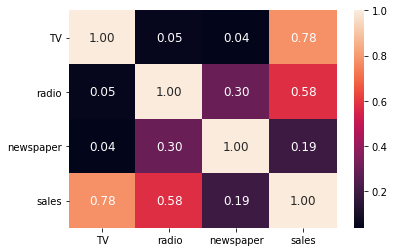

In [21]:
sns.heatmap(df_new.corr(),annot=True,annot_kws={'size':12},fmt='.2f')
plt.show()

# Observation:-
- Our assumption is right that TV is strongly corelate with the target variable.
- Radio is 58 % correlate with the target variable, which is quite good.
- newspaper is weakly correlated with the target variable.
Now we have 2 Option.
- Type_1:- Keeping All columns and build a model.
- Type_2:- Drop the newspaper column and build a model.
We build both type of model.


Let's Start with first one.

# Type :1 model

In [22]:
# splitting the dataset
x=df_new.drop('sales',axis=1)
y=df_new['sales']

In [23]:
# before building a model let's first bring down all the features in a common scale using StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

# Linear Regression

In [24]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

## finding best random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training score is :-  {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing score is :- {r2_score(y_test,pred_test)}")
    print('\n')


At random state 0, the training score is :-  0.8809815114877093
At random state 0, the testing score is :- 0.9192292099940128


At random state 1, the training score is :-  0.8913019322192781
At random state 1, the testing score is :- 0.9019072465199103


At random state 2, the training score is :-  0.9140343278823455
At random state 2, the testing score is :- 0.8428510510387104


At random state 3, the training score is :-  0.8859765389632644
At random state 3, the testing score is :- 0.9146601229873866


At random state 4, the training score is :-  0.9003478079316004
At random state 4, the testing score is :- 0.8624168946131681


At random state 5, the training score is :-  0.9000990833163485
At random state 5, the testing score is :- 0.8663632469872826


At random state 6, the training score is :-  0.8938492316677792
At random state 6, the testing score is :- 0.893693353627694


At random state 7, the training score is :-  0.8914121178984524
At random state 7, the testing score is :

At random state 16 the difference between training score and testing score is very less. That's why we take random state as 16.

In [25]:
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=16)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)


In [26]:
print(r2_score(y_test,pred_test))

0.9026144560997302


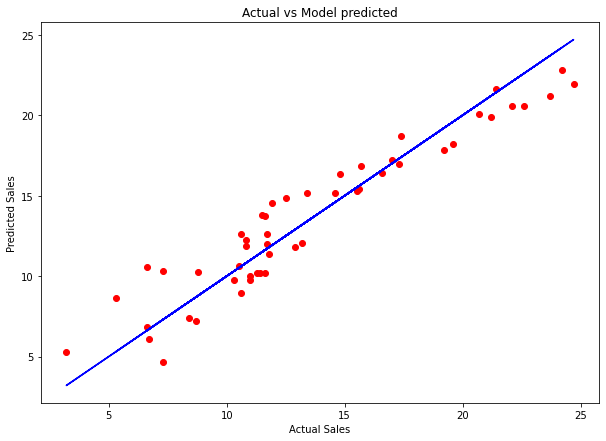

In [27]:
#### Let's plot it for better visualization
plt.figure(figsize=(10,7))
plt.scatter(y_test,pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Model predicted')
plt.show()

In above graph, blue line representing our Actual values, and the red dots are the predictions. The blue line is quite good overlaping, but some where some values are going out of hand. So these are the values where we can imporve.

## Cross Validation of the Model:

Although the testing score is looking quite well it may be look good because of overfitting.

let's take a test.

In [28]:
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(lr,x_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and accuracy  score for the training is {train_score} and accuracy for the testing is {test_score}")
    print('\n')      

At cross fold 2 the cv score is 0.8894395330464461 and accuracy  score for the training is 0.8920400049122265 and accuracy for the testing is 0.9026144560997302


At cross fold 3 the cv score is 0.8889614061129034 and accuracy  score for the training is 0.8920400049122265 and accuracy for the testing is 0.9026144560997302


At cross fold 4 the cv score is 0.8883964730592853 and accuracy  score for the training is 0.8920400049122265 and accuracy for the testing is 0.9026144560997302


At cross fold 5 the cv score is 0.8857406146589943 and accuracy  score for the training is 0.8920400049122265 and accuracy for the testing is 0.9026144560997302


At cross fold 6 the cv score is 0.8868941047683484 and accuracy  score for the training is 0.8920400049122265 and accuracy for the testing is 0.9026144560997302


At cross fold 7 the cv score is 0.8840400627916499 and accuracy  score for the training is 0.8920400049122265 and accuracy for the testing is 0.9026144560997302


At cross fold 8 the cv

Since the number of folds don't have such impact on the accuracy and cv_score . So cv=3 is selected.

So here we have handled the problem of overfitting by  checking training score and testing score.

# Regularization:

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [30]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,21)), 'max_iter':list(range(500,1000,50))}

ls=Lasso()
gsc=GridSearchCV(ls,parameters)
gsc.fit(x_train,y_train)

print(gsc.best_params_)

{'alpha': 0.1, 'max_iter': 500, 'random_state': 0}


In [31]:
ls=Lasso(alpha=0.1 , random_state= 0, max_iter=500)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

ls_score=r2_score(y_test,pred_ls)
ls_score

0.8962842848435637

In [32]:
cv_score=cross_val_score(ls,x_scaled,y,cv=3)
cv_mean=cv_score.mean()
cv_mean

0.8892350353175907

# Model Evaluation:


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [34]:
y_pred=ls.predict(x_test)
print('The mean abbsolute error of the model is :- ',mean_absolute_error(y_test,y_pred))
print('The mean_squared_error of the model is :- ',mean_squared_error(y_test,y_pred))
print('The Squareroot of Mean square error is :- ', np.sqrt(mean_squared_error(y_test,y_pred)))

The mean abbsolute error of the model is :-  1.3852548336861465
The mean_squared_error of the model is :-  2.8448179361630292
The Squareroot of Mean square error is :-  1.6866588084621708


# Random Forest Regressor:

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
rf=RandomForestRegressor()

In [36]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i}, the training score is :-  {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing score is :- {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training score is :-  0.9958028703700049
At random state 0, the testing score is :- 0.9817322078203714


At random state 1, the training score is :-  0.9967655473984394
At random state 1, the testing score is :- 0.9855389773649815


At random state 2, the training score is :-  0.9971952300140998
At random state 2, the testing score is :- 0.9724235873256112


At random state 3, the training score is :-  0.9954130706949547
At random state 3, the testing score is :- 0.9758189370318163


At random state 4, the training score is :-  0.9968430077971618
At random state 4, the testing score is :- 0.9751232948612484


At random state 5, the training score is :-  0.9968290252225798
At random state 5, the testing score is :- 0.9811777831029199


At random state 6, the training score is :-  0.9963612630518868
At random state 6, the testing score is :- 0.9735621356392834


At random state 7, the training score is :-  0.9961699643329697
At random state 7, the testing score is 

At random state 77 the difference between training score and testing score is very less. That's why we take random state as 77.

In [37]:
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=77)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)

print(r2_score(y_test,pred_test))

0.9918080132133961


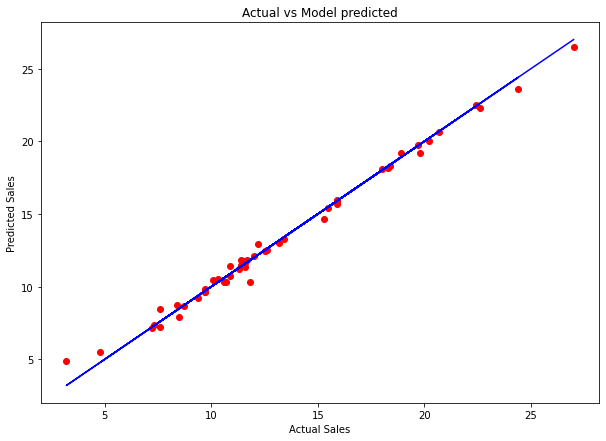

In [38]:
#### Let's plot it for better visualization
plt.figure(figsize=(10,7))
plt.scatter(y_test,pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Model predicted')
plt.show()

There are 5 or 6 points which is show a some kind of error. There are 8 residevals. We have some kind of matrix which tell us overall ressiduals.

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred=rf.predict(x_test)
print('The mean abbsolute error of the model is :- ',mean_absolute_error(y_test,y_pred))
print('The mean_squared_error of the model is :- ',mean_squared_error(y_test,y_pred))
print('The Squareroot of Mean square error is :- ', np.sqrt(mean_squared_error(y_test,y_pred)))

The mean abbsolute error of the model is :-  0.31294000000000016
The mean_squared_error of the model is :-  0.21428350000000126
The Squareroot of Mean square error is :-  0.4629076581781741


# Cross Validation of the model:

In [40]:
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(rf,x_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and accuracy  score for the training is {train_score} and accuracy for the testing is {test_score}")
    print('\n') 

At cross fold 2 the cv score is 0.9703540194082527 and accuracy  score for the training is 0.9909845608918099 and accuracy for the testing is 0.9918080132133961


At cross fold 3 the cv score is 0.9727494572623683 and accuracy  score for the training is 0.9909845608918099 and accuracy for the testing is 0.9918080132133961


At cross fold 4 the cv score is 0.9772845681167918 and accuracy  score for the training is 0.9909845608918099 and accuracy for the testing is 0.9918080132133961


At cross fold 5 the cv score is 0.9753382640824073 and accuracy  score for the training is 0.9909845608918099 and accuracy for the testing is 0.9918080132133961


At cross fold 6 the cv score is 0.9776043341140284 and accuracy  score for the training is 0.9909845608918099 and accuracy for the testing is 0.9918080132133961


At cross fold 7 the cv score is 0.9765940293424873 and accuracy  score for the training is 0.9909845608918099 and accuracy for the testing is 0.9918080132133961


At cross fold 8 the cv

Since the number of folds don't have such impact on the accuracy and cv_score . So cv=8 is selected.

So here we have handled the problem of overfitting by checking training score and testing score.

# Hyper Parameter Tunning

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

parameter={'criterion': ['mse','mae'],'max_features':['auto','sqrt','log2'],'n_estimators':list(range(50,101,10)),
           'max_depth':[6,7,8]}
gscv=GridSearchCV(rf,parameter)
gscv.fit(x_train,y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 80}


In [42]:
rf=RandomForestRegressor(criterion= 'mae', max_features='auto' , n_estimators= 80, max_depth= 7)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)

rf_score=r2_score(y_test,y_pred)
print('r2 Score is :- ', rf_score*100)

rf_cv_score= cross_val_score(rf,x_scaled,y,cv=7)
print(' Random forest cross fold score is :- ', rf_cv_score.mean()*100)

r2 Score is :-  98.0876159078097
 Random forest cross fold score is :-  97.73640813312657


The final r2 score is 98.2% and cv score is 97.69%. The differece between both of them is very less.

The final Conclusion is The Random Forest Regressor give us the better result.

# SVM

In [43]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score 
svr=SVR()

In [44]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=i)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print(f"At random state {i}, the training score is :-  {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing score is :- {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training score is :-  0.9098310578813125
At random state 0, the testing score is :- 0.8777315838855321


At random state 1, the training score is :-  0.9180619881143983
At random state 1, the testing score is :- 0.9439549560875377


At random state 2, the training score is :-  0.9215227667038215
At random state 2, the testing score is :- 0.8638992491445929


At random state 3, the training score is :-  0.9167380360395683
At random state 3, the testing score is :- 0.9012971023989982


At random state 4, the training score is :-  0.92615921105942
At random state 4, the testing score is :- 0.9292506038833431


At random state 5, the training score is :-  0.9254393607666486
At random state 5, the testing score is :- 0.8713942296895165


At random state 6, the training score is :-  0.9113388214318404
At random state 6, the testing score is :- 0.9021838760630428


At random state 7, the training score is :-  0.9144708366577934
At random state 7, the testing score is :-

At Random State 26, difference between training score and testing score is very less.

In [45]:
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=26)
pred_train=svr.predict(x_train)
pred_test=svr.predict(x_test)

print(r2_score(y_test,pred_test))

0.9285964432899771


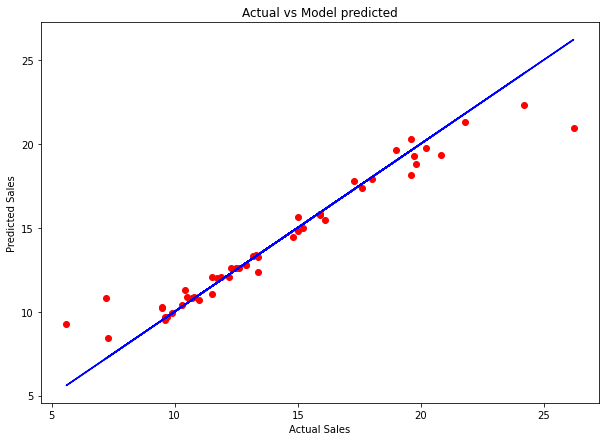

In [46]:
#### Let's plot it for better visualization
plt.figure(figsize=(10,7))
plt.scatter(y_test,pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Model predicted')
plt.show()

We can see that only 10 to 12 data points are far from the predicted line.

# Cross Validation

In [47]:
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(svr,x_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and accuracy  score for the training is {train_score} and accuracy for the testing is {test_score}")
    print('\n')

At cross fold 2 the cv score is 0.8493674659590948 and accuracy  score for the training is 0.9042295788059593 and accuracy for the testing is 0.9285964432899771


At cross fold 3 the cv score is 0.88981945622717 and accuracy  score for the training is 0.9042295788059593 and accuracy for the testing is 0.9285964432899771


At cross fold 4 the cv score is 0.8978806270851241 and accuracy  score for the training is 0.9042295788059593 and accuracy for the testing is 0.9285964432899771


At cross fold 5 the cv score is 0.9041170072126675 and accuracy  score for the training is 0.9042295788059593 and accuracy for the testing is 0.9285964432899771


At cross fold 6 the cv score is 0.9095413796185904 and accuracy  score for the training is 0.9042295788059593 and accuracy for the testing is 0.9285964432899771


At cross fold 7 the cv score is 0.9065762269400525 and accuracy  score for the training is 0.9042295788059593 and accuracy for the testing is 0.9285964432899771


At cross fold 8 the cv s

At Cv= 10 gives us the best result.
Cv=10 selected.

# let's Tune the parameters:

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr=SVR()

parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10], 'max_iter':list(range(1,101))}

grid_score = GridSearchCV(svr, parameters, cv=10)
grid_score.fit(x,y)
grid_score.best_params_


{'C': 10, 'kernel': 'rbf', 'max_iter': 87}

In [49]:
svr=SVR(kernel="rbf",C=10,max_iter=87)
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
y_pred=svr.predict(x_test)

rf_score=r2_score(y_test,y_pred)
print('r2 Score is :- ', rf_score*100)

rf_cv_score= cross_val_score(svr,x_scaled,y,cv=10)
print('SVM cross fold score is :- ', rf_cv_score.mean()*100)

r2 Score is :-  97.57989099561742
SVM cross fold score is :-  97.50152899278073


## Conclusion: -
After building 3 models the random forest gives us the best result so now we will save random forest's model for future predictions. 

In [50]:
## Saving the model to the local file system
import pickle
filename='Advertising_sale_model.pickle'
pickle.dump(rf, open(filename, 'wb'))

## prediction using the saved model

In [51]:
loaded_model=pickle.load(open(filename,'rb'))
test=loaded_model.predict(scaler.transform([[80,27,9]]))
test

array([12.54])

The above array mean if I invest 80 doller in TV 27 doller in Radio and 9 doller in newspapers,then I will get 12.5 doller profit.

# Type_2 Model:

In this model we will drop the newspaper because newspaper is very less correlate with the target variable.

In [22]:
# splitting the dataset
x=df_new.drop(columns=['sales','newspaper'],axis=1)
y=df_new['sales']
x.head(3)

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9


In [23]:
## let's Scale it
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.97869734,  0.98952135],
       [-1.19901165,  1.09070498],
       [-1.51933199,  1.53591293],
       [ 0.05645636,  1.22561648],
       [ 0.40024339, -0.83178391],
       [-1.61906543,  1.73828018],
       [-1.04647815,  0.6522426 ],
       [-0.31079737, -0.23817331],
       [-1.62023876, -1.41864895],
       [ 0.62317696, -1.38492107],
       [-0.94557138, -1.16906267],
       [ 0.79800381,  0.05863199],
       [-1.44189191,  0.80739083],
       [-0.57714432, -1.04764232],
       [ 0.67363035,  0.65898817],
       [ 0.57155024,  1.65733328],
       [ 1.58061798,  1.1109417 ],
       [-0.90919801, -0.17746313],
       [ 0.0071763 ,  0.05188642],
       [ 0.84141719,  0.30821827],
       [ 1.06435076, -1.21628169],
       [-1.56626537, -0.48775959],
       [ 0.95757732, -0.42030384],
       [-0.99015809, -0.71036356],
       [ 1.36355108, -1.32421089],
       [-0.04445042,  0.41614747],
       [ 1.0960308 , -0.43379499],
       [ 1.19811091,  0.26774482],
       [-0.89277132,

# Random Forest Regressor

In [24]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()

In [25]:
from sklearn.metrics import r2_score

## finding best random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=i)
    Rf.fit(x_train,y_train)
    pred_train=Rf.predict(x_train)
    pred_test=Rf.predict(x_test)
    print(f"At random state {i}, the training score is :-  {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing score is :- {r2_score(y_test,pred_test)}")
    print('\n')


At random state 0, the training score is :-  0.9965063627032352
At random state 0, the testing score is :- 0.983622217893712


At random state 1, the training score is :-  0.9973732613452987
At random state 1, the testing score is :- 0.9882951641470126


At random state 2, the training score is :-  0.9974260842670166
At random state 2, the testing score is :- 0.9754973205765817


At random state 3, the training score is :-  0.9962681984645826
At random state 3, the testing score is :- 0.9778601527665557


At random state 4, the training score is :-  0.9973968515800228
At random state 4, the testing score is :- 0.9831765348270486


At random state 5, the training score is :-  0.9972802218118301
At random state 5, the testing score is :- 0.9860374947759317


At random state 6, the training score is :-  0.997442044318692
At random state 6, the testing score is :- 0.977471980016883


At random state 7, the training score is :-  0.9968511896407626
At random state 7, the testing score is :- 

At random state 71 gives best result.

In [26]:
x_train,x_test,y_train,y_test=tts(x_scaled,y,test_size=0.25,random_state=71)
pred_train=Rf.predict(x_train)
pred_test=Rf.predict(x_test)
print(r2_score(y_test,pred_test))

0.9947354091810044


# Cross Validation:


In [27]:
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,11):
    cv_score=cross_val_score(Rf,x_scaled,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean} and accuracy  score for the training is {train_score} and accuracy for the testing is {test_score}")
    print('\n')

At cross fold 2 the cv score is 0.9731246674492516 and accuracy  score for the training is 0.9911972136978866 and accuracy for the testing is 0.9947354091810044


At cross fold 3 the cv score is 0.9796735127410628 and accuracy  score for the training is 0.9911972136978866 and accuracy for the testing is 0.9947354091810044


At cross fold 4 the cv score is 0.9799519360837059 and accuracy  score for the training is 0.9911972136978866 and accuracy for the testing is 0.9947354091810044


At cross fold 5 the cv score is 0.9782824925492095 and accuracy  score for the training is 0.9911972136978866 and accuracy for the testing is 0.9947354091810044


At cross fold 6 the cv score is 0.979928796759451 and accuracy  score for the training is 0.9911972136978866 and accuracy for the testing is 0.9947354091810044


At cross fold 7 the cv score is 0.9799610113083291 and accuracy  score for the training is 0.9911972136978866 and accuracy for the testing is 0.9947354091810044


At cross fold 8 the cv 

At Cv=4 give us the best result.

# Hyperparameter tunning.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()

parameter={'criterion': ['mse','mae'],'max_features':['auto','sqrt','log2'],'n_estimators':list(range(50,101,10)),
           'max_depth':[6,7,8]}
gscv=GridSearchCV(Rf,parameter)
gscv.fit(x_train,y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 60}


In [29]:
Rf=RandomForestRegressor(criterion= 'mae', max_features='auto' , n_estimators= 50, max_depth= 7)
Rf.fit(x_train,y_train)
Rf.score(x_train,y_train)
y_pred=Rf.predict(x_test)

rf_score=r2_score(y_test,y_pred)
print('r2 Score is :- ', rf_score*100)

rf_cv_score= cross_val_score(Rf,x_scaled,y,cv=7)
print(' Random forest cross fold score is :- ', rf_cv_score.mean()*100)

r2 Score is :-  98.60746690362195
 Random forest cross fold score is :-  97.93368905953068


# Model Evaluation:

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred=Rf.predict(x_test)
print('The mean abbsolute error of the model is :- ',mean_absolute_error(y_test,y_pred))
print('The mean_squared_error of the model is :- ',mean_squared_error(y_test,y_pred))
print('The Squareroot of Mean square error is :- ', np.sqrt(mean_squared_error(y_test,y_pred)))

The mean abbsolute error of the model is :-  0.4615999999999997
The mean_squared_error of the model is :-  0.34464547999999995
The Squareroot of Mean square error is :-  0.5870651411896298


# Saving the model

In [32]:
## Saving the model to the local file system
import pickle
filename_2='Advertising_sale_model_2.pickle'
pickle.dump(Rf, open(filename_2, 'wb'))

# Comparing type_1 model and type_2 Model
# Type_1 vs Type_2

In [33]:
### Type_1
loaded_model=pickle.load(open(filename_2,'rb'))
test=loaded_model.predict(scaler.transform([[80,27]]))
test

array([12.4])

We can clearily see that When we build the type_1 model when we have TV , Radio,and newspaper as a feature and giving the random data to the model for prediction. The model give us 12.5 dollers profit.

But now when we built type_2 model in which we drop the newspaper column and then predict the model and give same random data which we give our prevision model, and we get 12.4 dollers profite.

The margin of profite is almost same.

The conclusion is that if we don't invest to advertising in the newspapers, we will not loose much.